<a href="https://colab.research.google.com/github/manjari-cse/Lung-Cancer-Nodule-detection/blob/main/lung_image_rendering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 42.5MB 104kB/s 


Parsing Annotations file

In [ ]:
import pandas as pd
files = pd.read_csv('/content/candidates.csv')
files.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0.0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0.0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0.0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0.0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0.0


In [ ]:
files.shape

(62193, 5)

In [ ]:
files['class'].value_counts()

0.0    62045
1.0      147
Name: class, dtype: int64

Get the header information from mhd file

In [ ]:
ds = sitk.ReadImage("/content/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd", sitk.sitkFloat32)

In [ ]:
print(ds)

Image (0x1cf88c00)
  RTTI typeinfo:   itk::Image<float, 3u>
  Reference Count: 1
  Modified Time: 1610
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1583
  UpdateMTime: 1609
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 121]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 121]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 121]
  Spacing: [0.761719, 0.761719, 2.5]
  Origin: [-198.1, -195, -335.21]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.761719 0 0
0 0.761719 0
0 0 2.5

  PointToIndexMatrix: 
1.31282 0 0
0 1.31282 0
0 0 0.4

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x15084c10)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference

In [ ]:
origin = ds.GetOrigin()
spacing = ds.GetSpacing()
new_files = files[files['seriesuid']=='1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260']

In [ ]:
print(new_files)

                                               seriesuid  ...  class
9310   1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
9311   1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
9312   1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
9313   1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
9314   1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
...                                                  ...  ...    ...
10001  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
10002  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
10003  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
10004  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0
10005  1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...  ...    0.0

[696 rows x 5 columns]


In [ ]:
x = new_files['coordX'][9310]
y = new_files['coordY'][9310]
z = new_files['coordZ'][9310]
print(x)
print(y)
print(z)

129.56815129
45.3770967403
-277.835757804


In [ ]:
import numpy as np
x1 = np.abs(x-origin[0])/spacing[0]
x2 = np.abs(y-origin[1])/spacing[1]
x3 = np.abs(z-origin[2])/spacing[2]

In [ ]:
print(x1)
print(x2)
print(x3)

430.169343645061
315.5718846386539
22.94969327839999


# **Extracting image from .mhd and .zraw file**

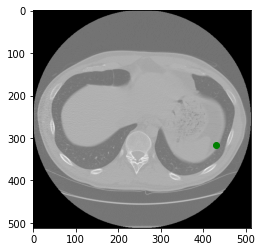

'\nplt.figure(figsize=(10,5))\nplt.gray()\n\nfor i in range(121):#displayed only 12 images out of 512\n    print(i)\n    plt.imshow(ct_scans[i])\n    plt.show()\n\n'

In [ ]:
import SimpleITK as sitk
import matplotlib.pylab as plt
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("/content/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd", sitk.sitkFloat32))
plt.imshow(ct_scans[21])
plt.plot(430,316,'go')
plt.show()
'''
plt.figure(figsize=(10,5))
plt.gray()

for i in range(121):#displayed only 12 images out of 512
    print(i)
    plt.imshow(ct_scans[i])
    plt.show()

'''

# **Extracting the details annotation.csv file**

In [ ]:
import csv
with open('/content/sample_data/annotations.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
        print(row)

['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '-128.6994211', '-175.3192718', '-298.3875064', '5.651470635']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', '103.7836509', '-211.9251487', '-227.12125', '4.224708481']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208', '69.63901724', '-140.9445859', '876.3744957', '5.786347814']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '-24.0138242', '192.1024053', '-391.0812764', '8.143261683']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '2.441546798', '172.4648812', '-405.4937318', '18.54514997']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '90.93171321', '149.0272657', '-426.5447146', '18.20857028']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', '89.54076865', '196.4051593', '-515.0733216', '16.38127631']
['1.3.6.1.4.1.14519.5.2.1.6279

# **Extracting details from candidates.csv file**

In [ ]:
import csv
with open('/content/sample_data/candidates.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
        print(row)

Streaming output truncated to the last 5000 lines.
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '-56.31', '-124.07', '-146.79', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '61.74', '-80.95', '-248.99', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '-68.7', '-136.47', '-144.69', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '52.57', '-81.49', '-197.19', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '77.91', '-122.45', '-209.79', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '-53.07', '-133.24', '-134.89', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '62.82', '-173.67', '-271.39', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '84.92', '-178.52', '-267.89', '0']
['1.3.6.1.4.1.14519.5.2.1.6279.6001.109882169963817627559804568094', '89.77', '-156.95', '-139.79', '0']
['1.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import SimpleITK as sitk
import matplotlib.pylab as plt
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("/content/image/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd", sitk.sitkFloat32))
plt.figure(figsize=(20,16))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.01,0.01)

for i in range(ct_scans.shape[2]):
    plt.subplot(10,10,i+1), plt.imshow(ct_scans[i]), plt.axis('off')

plt.show()